In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./L2T3_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   City                  9542 non-null   object 
 3   Address               9542 non-null   object 
 4   Longitude             9542 non-null   float64
 5   Latitude              9542 non-null   float64
 6   Cuisines              9542 non-null   object 
 7   Average Cost for two  9542 non-null   int64  
 8   Currency              9542 non-null   object 
 9   Has Table booking     9542 non-null   int64  
 10  Has Online delivery   9542 non-null   int64  
 11  Is delivering now     9542 non-null   int64  
 12  Price range           9542 non-null   int64  
 13  Aggregate rating      9542 non-null   float64
 14  Rating color          9542 non-null   int64  
 15  Rating text          

In [7]:
# Dropping Unncessary Columns
drop_cols = ['Address_Length', 'Name_Length', 'Longitude', 'Latitude', 'Currency', 'Average Cost for two', 'Address', 'Restaurant Name', 'City', 'Cuisines']
df2 = df.drop(columns=drop_cols)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Code         9542 non-null   int64  
 1   Has Table booking    9542 non-null   int64  
 2   Has Online delivery  9542 non-null   int64  
 3   Is delivering now    9542 non-null   int64  
 4   Price range          9542 non-null   int64  
 5   Aggregate rating     9542 non-null   float64
 6   Rating color         9542 non-null   int64  
 7   Rating text          9542 non-null   int64  
 8   Votes                9542 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 671.0 KB


In [ ]:
# based on 4 factors below we will predict the Aggregate rating
'''
1. Country Code
2. Has Table booking
3. Has Online delivery
4. Is delivering now
'''

In [12]:
x = df2.drop(columns=['Aggregate rating'])
y = df2['Aggregate rating']

In [17]:
x.head()

,Country Code,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating color,Rating text,Votes
0,162,1,0,0,3,0,1,314
1,162,1,0,0,3,0,1,591
2,162,1,0,0,4,1,5,270
3,162,0,0,0,4,0,1,365
4,162,1,0,0,4,0,1,229


In [18]:
y.head()

0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [20]:
x.head()

,Country Code,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating color,Rating text,Votes
0,0.748837,1.0,0.0,0.0,0.666667,0.0,0.2,0.028718
1,0.748837,1.0,0.0,0.0,0.666667,0.0,0.2,0.054052
2,0.748837,1.0,0.0,0.0,1.000000,0.2,1.0,0.024694
3,0.748837,0.0,0.0,0.0,1.000000,0.0,0.2,0.033382
4,0.748837,1.0,0.0,0.0,1.000000,0.0,0.2,0.020944


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (7633, 8)
y_train shape: (7633,)
x_test shape: (1909, 8)
y_test shape: (1909,)


Mean Squared Error: 1.313703347638408
R^2 Score: 0.4176470431505779
Accuracy: 41.76%


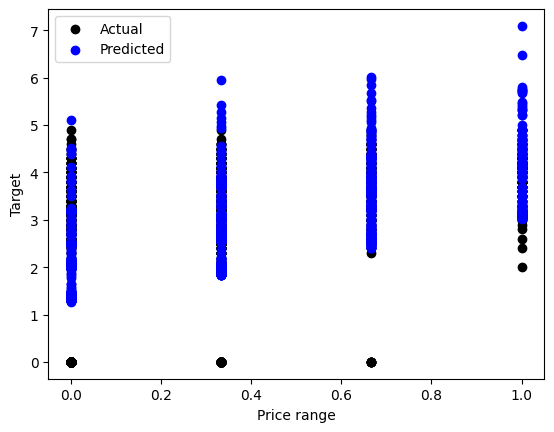

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model1 = LinearRegression()
model1.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Accuracy: {:.2f}%".format(r2*100))

# Plot the predictions vs. actual values
plt.scatter(x_test['Price range'], y_test, color='black', label='Actual')
plt.scatter(x_test['Price range'], y_pred, color='blue', label='Predicted')
plt.xlabel('Price range')
plt.ylabel('Target')
plt.legend()
plt.show()

In [57]:
pred = model1.predict([[1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 345.0]])
print('Prediction for custom input : {:.1f}'.format(pred[0]))

Prediction for custom input : 2344.7


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 0.046639491758935496
R^2 Score: 0.9793251299994051
Accuracy: 97.93%


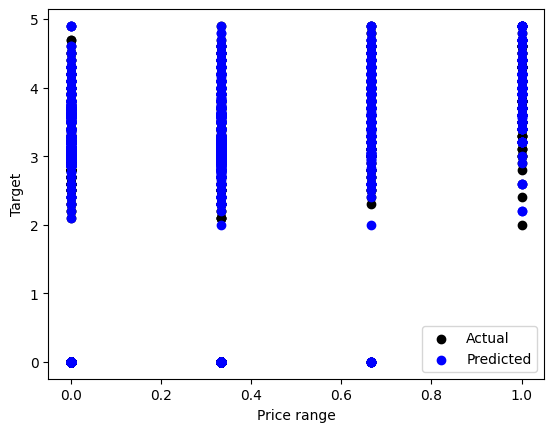

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Accuracy: {:.2f}%".format(r2*100))

# Plot the predictions vs. actual values
plt.scatter(x_test['Price range'], y_test, color='black', label='Actual')
plt.scatter(x_test['Price range'], y_pred, color='blue', label='Predicted')
plt.xlabel('Price range')
plt.ylabel('Target')
plt.legend()
plt.show()

In [60]:
pred = model2.predict([[1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 345.0]])
print('Prediction for custom input : {:.1f}'.format(pred[0]))

Prediction for custom input : 3.8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error: 0.035881160041408136
R^2 Score: 0.9840942023304847
Accuracy: 98.41%


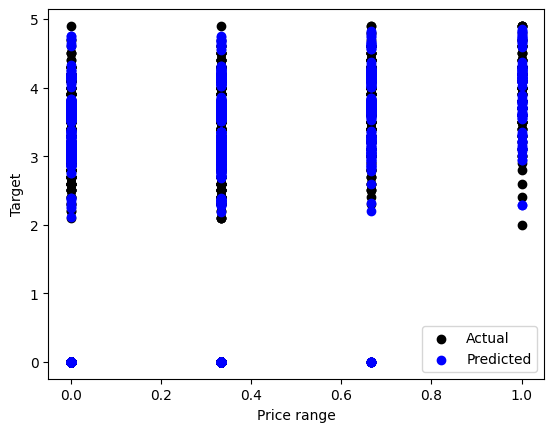

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Accuracy: {:.2f}%".format(r2*100))

# Plot the predictions vs. actual values
plt.scatter(x_test['Price range'], y_test, color='black', label='Actual')
plt.scatter(x_test['Price range'], y_pred, color='blue', label='Predicted')
plt.xlabel('Price range')
plt.ylabel('Target')
plt.legend()
plt.show()

In [62]:
pred = model3.predict([[1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 345.0]])
print('Prediction for custom input : {:.1f}'.format(pred[0]))

Prediction for custom input : 3.6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [64]:
# Random Forest is the best method for this dataset
# as it's accuracy is 98.41%,
# R2 Score in less than 1, &
# the MSE is least amongst all other methods used
# which means that the model is not overfitting, &
# output will be closest to the real output

In [ ]:
df2.to_csv('')